# LWI - HEC-RAS Input/Output

### _Notebook_
--- 

### QA/QC
#### Global Errors Check
This notebook retreives the input and output data in a HEC-RAS model. The input and output data is plotted for inspection and QA/QC of the model.
The QA/QC of this notebook is intended to identify global issues in a model simulation that require follow-up responses from the modeler in a flooding study.

Global issues currently implemented include:
 
 
 __1. Check Overall Model Error__
 
    A. Volume Accounting Error

 __2. Check Model inputs__
 
    B. Plan Information
    C. Plan Parameters
    D. Boundary Conditions 
    E. Spatially varying Manning's n
     
__3. Check Results for each domain (2D Flow Area) in the model__
 
    A. Depth Plots 
    B. Inflow hydrographs
    C. High Velocities at Cell Faces
    D. Computational Summary

#### Set paths
Set the path to the HEC-RAS model and to the location of the QA/QC scripts

In [26]:
model_path = "/home/jovyan/app/data/processed"
hecrasio_path = "/home/jovyan/app/src/data"

/home/jovyan/app/src/data/hecrasio/qaqc.py:1103: SyntaxWarning: invalid escape sequence '\*'
  """


#### Load Python Libraries

In [64]:
import sys;sys.path.append(hecrasio_path)
from osgeo import gdal
from hecrasio.core import *
from hecrasio.qaqc import *
#from hecrasio.s3tools import *
import scrapbook as sb

%reload_ext autoreload
%autoreload 2

/home/jovyan/app/src/data/hecrasio/qaqc.py:1108: SyntaxWarning: invalid escape sequence '\*'
  :param \**kwargs:


In [59]:
global_errors=[]
rasPlans = [] 

#### Read model output data 

*from AWS*

In [60]:
try:
    hdfResults_paths = [planPath]
except:
    model = list_files(model_path) 
    try: 
        hdfResults_paths = pull_result_paths(model) 
    except AssertionError as e: 
        global_errors.append(str(e)) 
        print(e)

In [61]:
for hdfResults_path in hdfResults_paths:  
    try: 
        rasPlan = HDFResultsFile(model, model_path, os.path.join(model_path, hdfResults_path))
        rasPlans.append(rasPlan) 
    except:
        error = 'Failed to read RAS plan: rasPlan error'
        global_errors.append(error)
        print(error)

Single domain found...


### 1.A Report the Volume Accounting Error

In [56]:
try:
    list_vol_errors(rasPlans)
except:
    error = 'Failed to retrieve volume accounting errors'
    global_errors.append(error)
    print(error)

### 2A. Plan Information

In [39]:
try:
    sb.glue(rasPlan.Plan_Information.to_json(), "json")
    display(HTML(rasPlan.Plan_Information.to_html()))
except:
    error = 'Failed to glue Plan Information'
    global_errors.append(error)
    print(error)

,Results
Base Output Interval,1HOUR
Computation Time Step Base,2MIN
Flow Filename,Amite_20200114.u01
Flow Title,Laura_all_AORC_Opt
Geometry Filename,Amite_20200114.g01
Geometry Title,Base_Geom_Opt
Plan Filename,Amite_20200114.p06
Plan Name,Laura_all_AORC_Opt
Plan ShortID,Laura_all_AORC_Opt
Plan Title,Laura_all_AORC_Opt


### 2B. Plan Parameters

In [21]:
try:
    sb.glue(rasPlan.Plan_Parameters.to_json(), "json")
    display(HTML(rasPlan.Plan_Parameters.to_html()))
except:
    error = 'Failed to glue Plan Parameters'
    global_errors.append(error)
    print(error)

,Results
1D Cores,0
1D Methodology,Finite Difference
1D2D Flow Tolerance,0.1
1D2D MaxIter,0
1D2D Minimum Flow Tolerance,1.0
1D2D WS Tolerance,0.01
2D Boundary Condition Ramp Up Fraction,[0.1]
2D Boundary Condition Volume Check,[b'False']
2D Cores (per mesh),[0]
2D Coriolis,False


### 2C. Boundary Conditions 

#### 2D Boundary Conditions Parameters

In [22]:
try:
    sb.glue(rasPlan.Precip2dSummary.to_json(), "json")
    display(HTML(rasPlan.Precip2dSummary.to_html()))
    sb.glue(rasPlan.Wind2dSummary.to_json(), "json")
    display(HTML(rasPlan.Wind2dSummary.to_html()))
except:
    error = 'Failed to glue 2D Forcing Data'
    global_errors.append(error)
    print(error)

,Results
DSS Filename,.\BC_Extended\AORC_Data\Gridded_Rainfall\AORC_202008_202009.dss
DSS Pathname,/AORC//PRECIPITATION/31JUL2020:2300/31JUL2020:2400//
Data Type,per-cum
Enabled,1
Mode,Gridded
Projection,"PROJCS[""USA_Contiguous_Albers_Equal_Area_Conic_USGS_version"",GEOGCS[""NAD83"",DATUM[""North_American_Datum_1983"",SPHEROID[""GRS 1980"",6378137,298.257222101,AUTHORITY[""EPSG"",""7019""]],AUTHORITY[""EPSG"",""6269""]],PRIMEM[""Greenwich"",0],UNIT[""Degree"",0.0174532925199433]],PROJECTION[""Albers_Conic_Equal_Area""],PARAMETER[""latitude_of_center"",23],PARAMETER[""longitude_of_center"",-96],PARAMETER[""standard_parallel_1"",29.5],PARAMETER[""standard_parallel_2"",45.5],PARAMETER[""false_easting"",0],PARAMETER[""false_northing"",0],UNIT[""metre"",1,AUTHORITY[""EPSG"",""9001""]],AXIS[""Easting"",EAST],AXIS[""Northing"",NORTH]]"
Raster Cellsize,2000.0
Raster Cols,178
Raster Left,242000.0
Raster Rows,180


,Results
Data Type,Wind
Projection,"GEOGCS[""unknown"",DATUM[""unnamed"",SPHEROID[""Spheroid"",6378137,298.257223563]],PRIMEM[""Greenwich"",0],UNIT[""degree"",0.0174532925199433,AUTHORITY[""EPSG"",""9122""]],AXIS[""Latitude"",NORTH],AXIS[""Longitude"",EAST]]"
Raster Cellsize,0.01
Raster Cols,226
Raster Left,-92.005
Raster Rows,126
Raster Top,31.005
Units,ft/s


#### 2D Boundary Conditions - Plots

,Results
Precipitation Units,inches
"Max. Precip. Intensity, in./hr.",7.850792
"Max. Precip. Extent, %",78.45
Avg. Total Point Precip.,4.839069
Var. Total Point Precip.,6.54666
Wind Speed Units,ft./sec.
Max. Wind Speed,75.340797
Avg. Wind Speed,6.581008
Median Wind Speed,4.716051
"Avg. Wind Dir., Deg.",138.985046


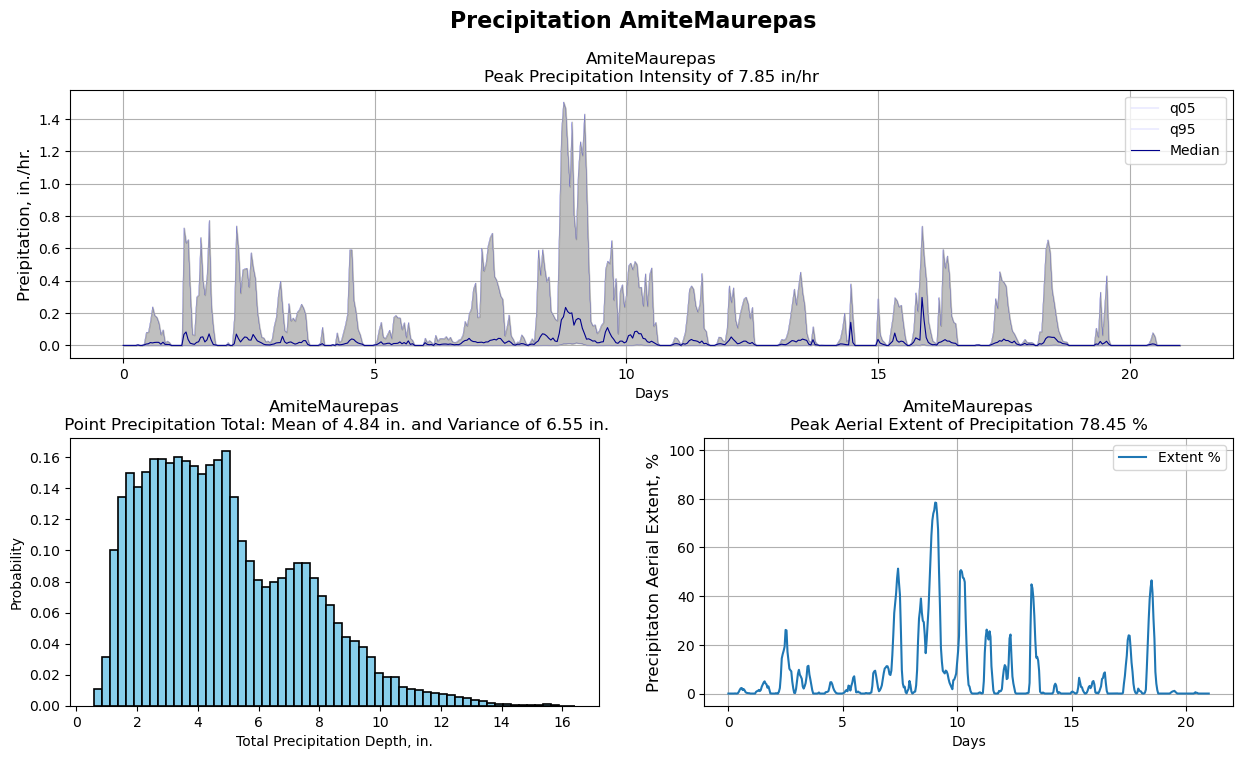

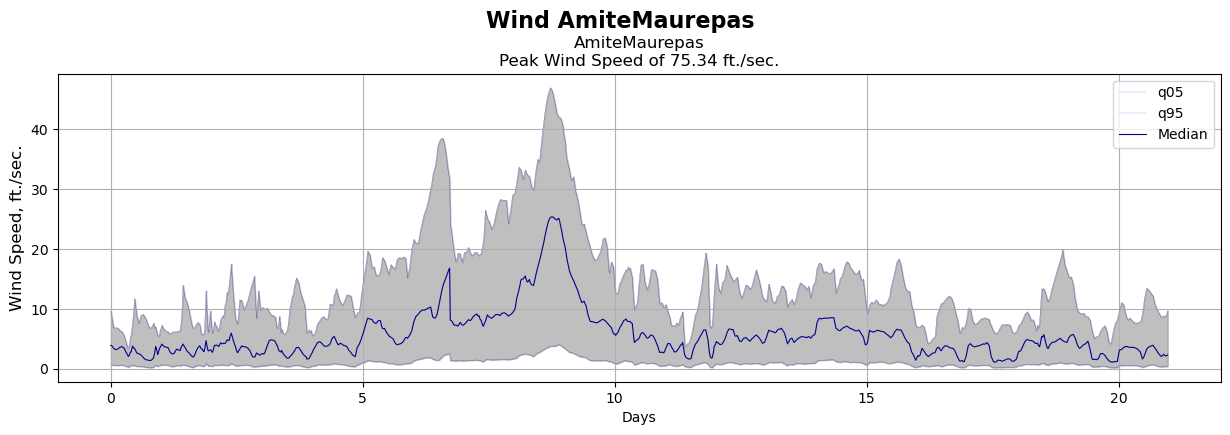

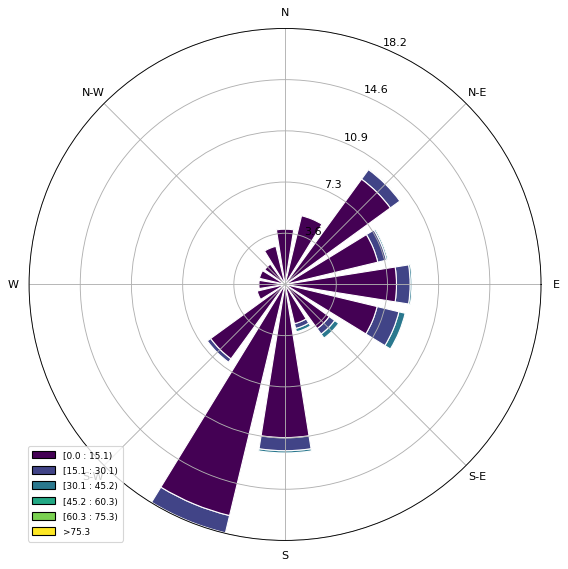

In [62]:
try:   
    forcing_2d_data = plot_2d_forcing(model, rasPlan, rasPlan.domains)
except:
    error = 'Failed to Show 2d Forcing Results'
    global_errors.append(error)
    print(error)

try:
    sb.glue(forcing_2d_data.to_json(), "json")
    display(HTML(forcing_2d_data.to_html()))
except:
    error = 'Failed to glue 2d Forcing Data'
    global_errors.append(error)
    print(error)

### 2E. Spatially varying Manning's n

In [ ]:
status_mannings_n, message, summary_table = check_Mannings_n(model, rasPlan)

if status_mannings_n:
    global_errors.append(message)

print(message)
summary_table

### 3A - 3C. Depth Plots, Inflow Hydrographs, High Velocities at cell faces, and Results Summary

Domain ID: AmiteMaurepas, Percent Cells that are Never Wet = 19.6
Domain ID: AmiteMaurepas, Average Cell Size = 800.0
Failed to Show Results


,Results_AmiteMaurepas
Percent Dry Cells at Min. Flood Extent,75.650000
Avg. Depth at Min. Flood Extent (wet cells),5.431352
Median Depth at Min. Flood Extent (wet cells),1.788110
Avg. Depth at Min. Flood Extent,1.322373
Median Depth at Min. Flood Extent,0.000000
Percent Dry Cells at Max. Flood Extent,19.600000
Avg. Depth at Max. Flood Extent (wet cells),3.234334
Median Depth at Max. Flood Extent (wet cells),1.646898
Avg. Depth at Max. Flood Extent,2.600484
Median Depth at Max. Flood Extent,1.142267


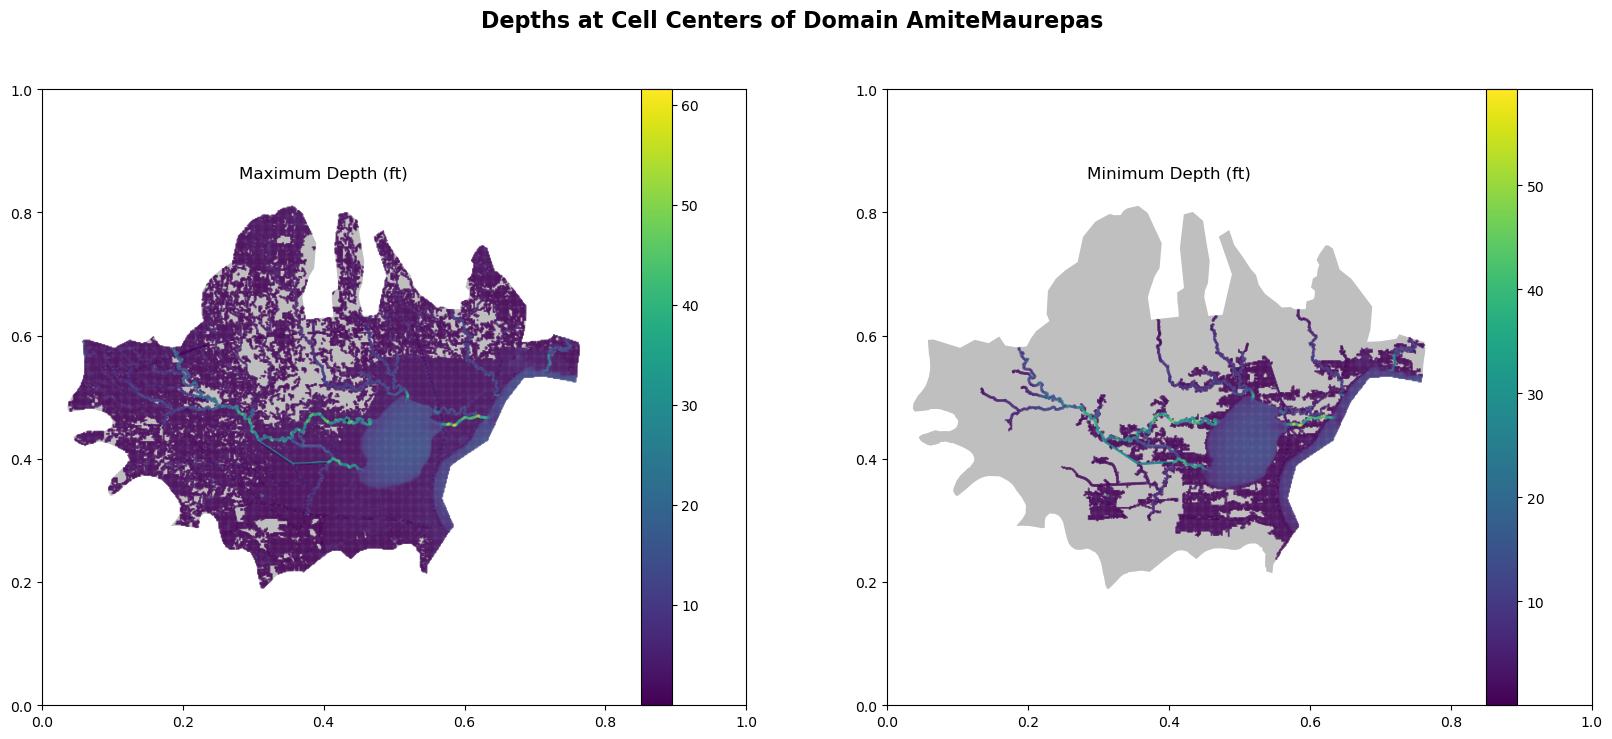

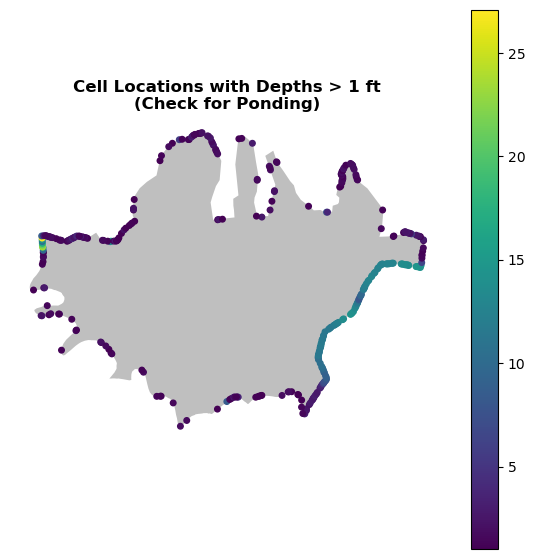

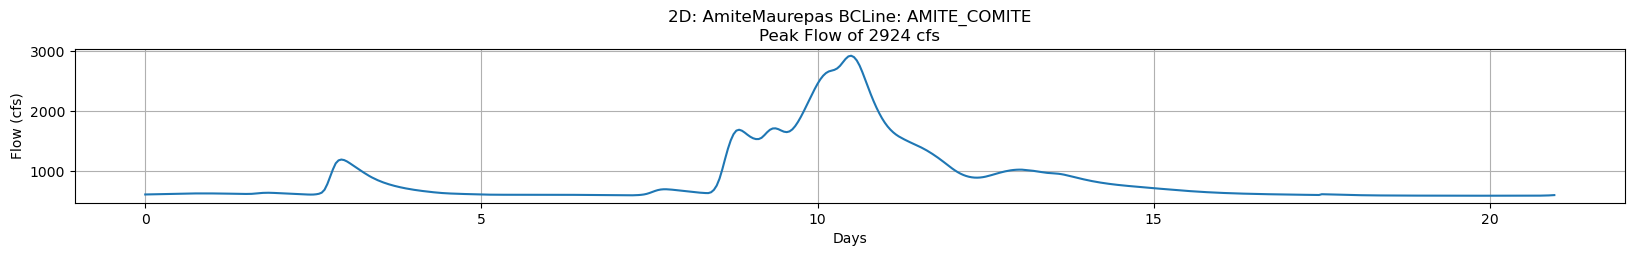

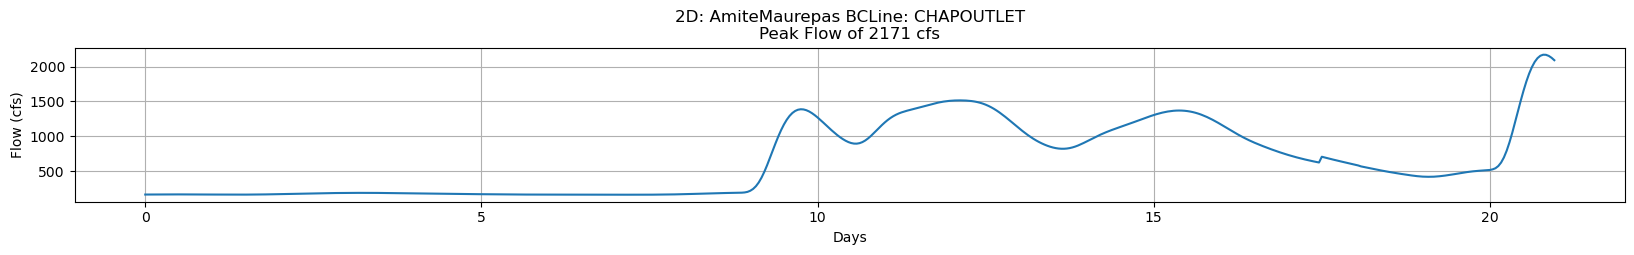

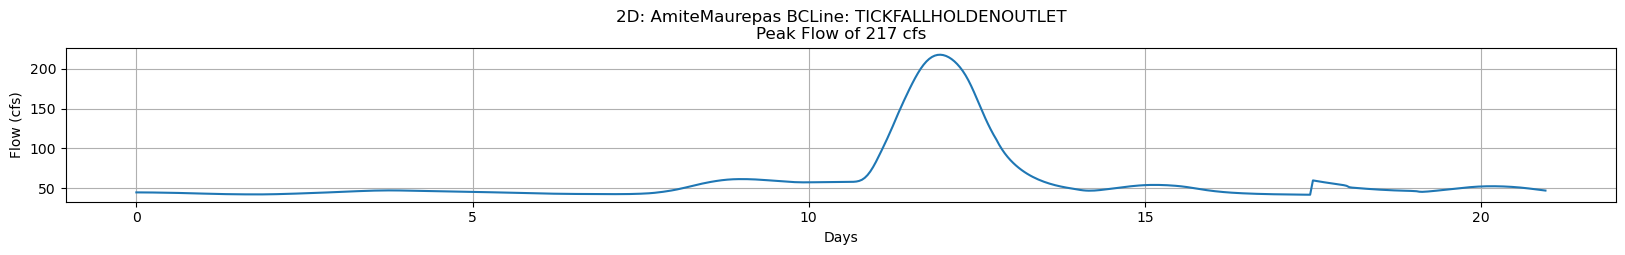

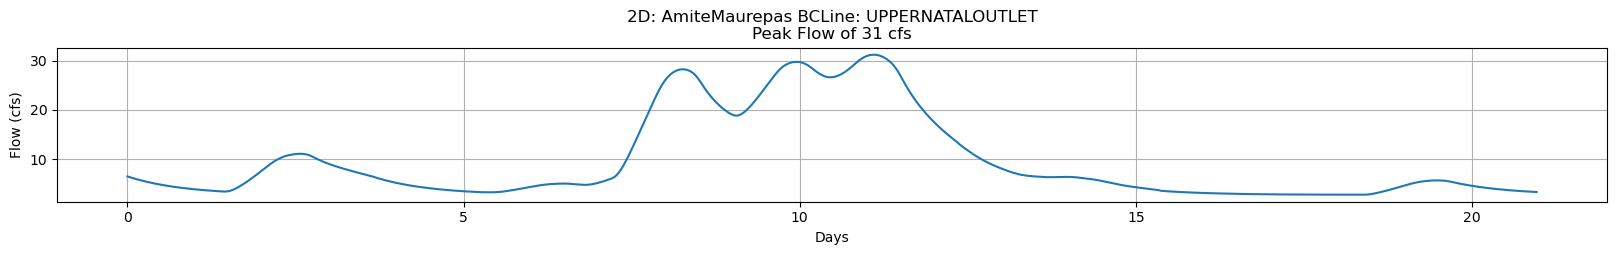

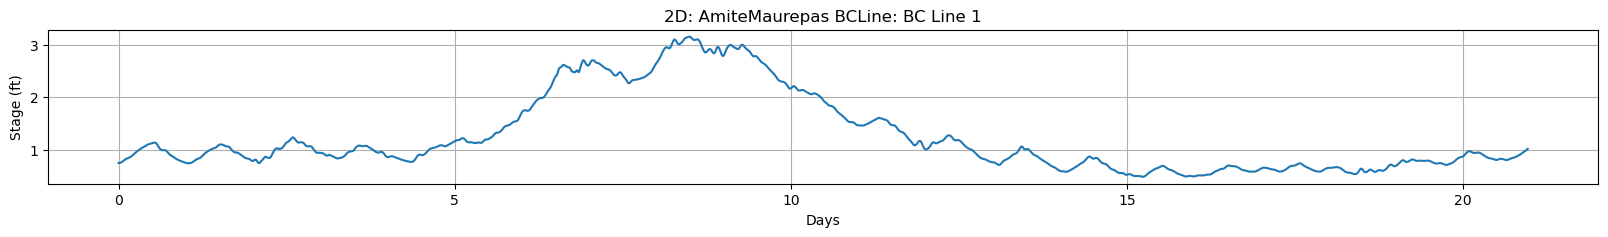

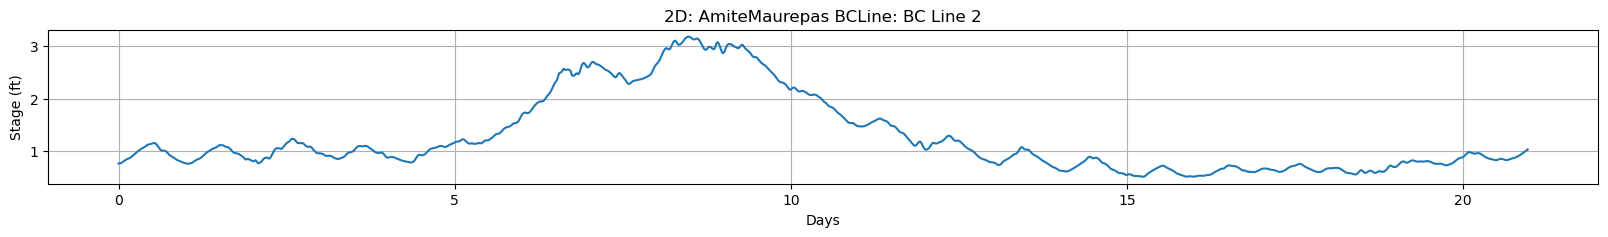

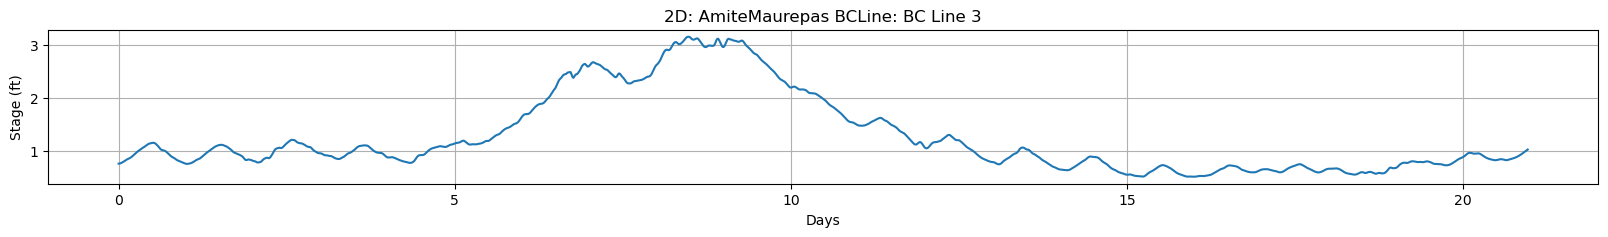

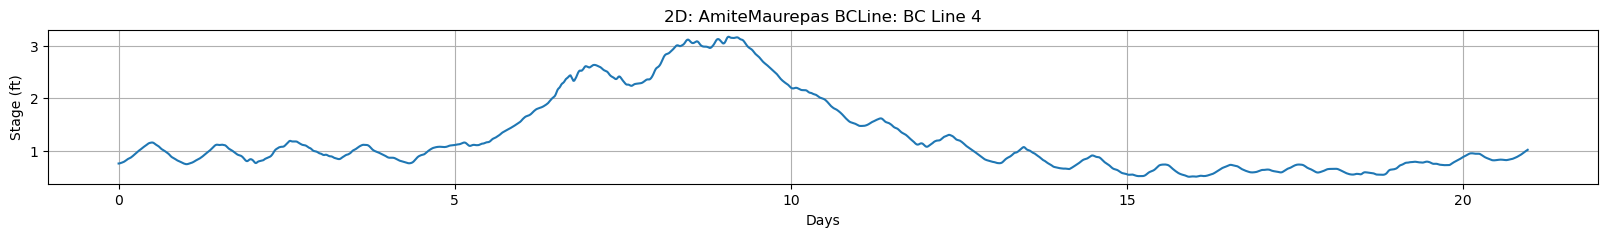

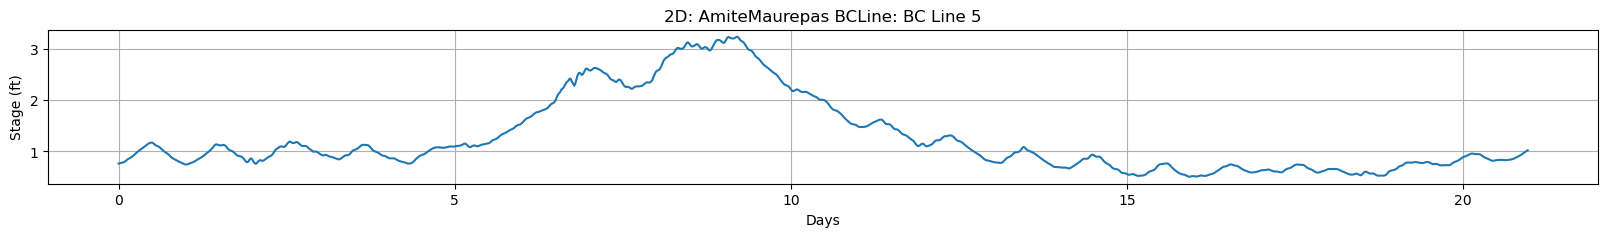

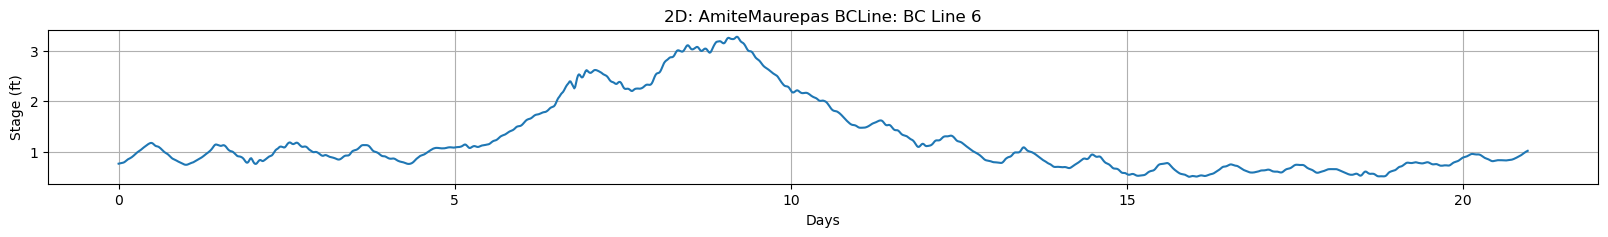

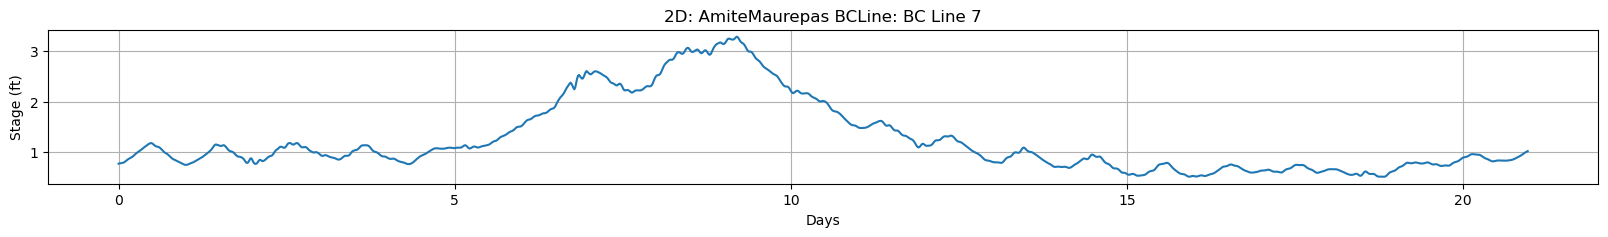

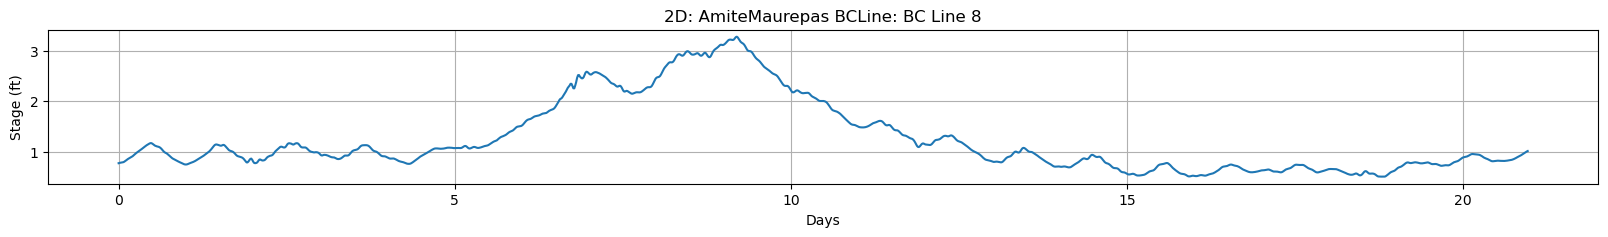

In [65]:
try:
    results_depth, results_data = show_results(rasPlan.domains, model, rasPlan)
except:
    error = 'Failed to Show Results'
    global_errors.append(error)
    print(error)

try:
    sb.glue(results_data.to_json(), "json")
    sb.glue(results_depth.to_json(), "json")
    display(HTML(results_depth.to_html()))
except:
    error = 'Failed to glue Results Data'
    global_errors.append(error)
    print(error)

### 3D. Computational Summary

In [12]:
try:
    non_nan = rasPlan.summary.replace(np.nan, "00:00:00")
    sb.glue(non_nan.to_json(), "json")
    display(HTML(rasPlan.summary.to_html()))
except:
    error = 'Failed to glue Plan Summary'
    global_errors.append(error)
    print(error)

,Results
Computation Time DSS,00:00:00
Computation Time Total,01:15:58
Maximum WSEL Error,0.0
Run Time Window,23DEC2022 16:14:54 to 23DEC2022 17:30:45
Solution,Unsteady Finished Successfully
Time Solution Went Unstable,NaN
Time Stamp Solution Went Unstable,Not Applicable
Error,-190.811234
Error Percent,0.003361
Precipitation Excess (acre feet),60840.941406


In [13]:
try:
    if len(global_errors) > 0:
        sb.glue("Global Errors", global_errors)
        print('Global errors have been glued!')
    else:
        print("No global errors identified.")
except:
    print('Gluing errors failed.')

No global errors identified.


# END